## *DATA VISUALIZATION*


# ***PACKAGE IMPORT***

In [1]:
import pandas
import seaborn
from matplotlib import pyplot

In [2]:
%config InlineBackend.figure_format = 'retina' #telling the notebook that this is a high resolution screen

In [3]:
seaborn.set_style('whitegrid')

# ***Data Import***

In [4]:
import pandas as pd
# Load the dataset
df = pd.read_csv('heart_failure.csv')

## Summary Statistics

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'hypertension', 'platelets', 'serum_creatinine',
       'serum_sodium', 'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [6]:
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [7]:
## Summary statistics of the 'age' column for each category of the 'death' column
df.groupby('death')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
death,,,,,,,,
No,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
Yes,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


In [8]:
df.shape

(299, 13)

In [9]:
# Show a frequency table of 'death' versus 'diabetes'
df.groupby('death').diabetes.value_counts()

death  diabetes
No     No          118
       Yes          85
Yes    No           56
       Yes          40
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='age', ylabel='platelets'>

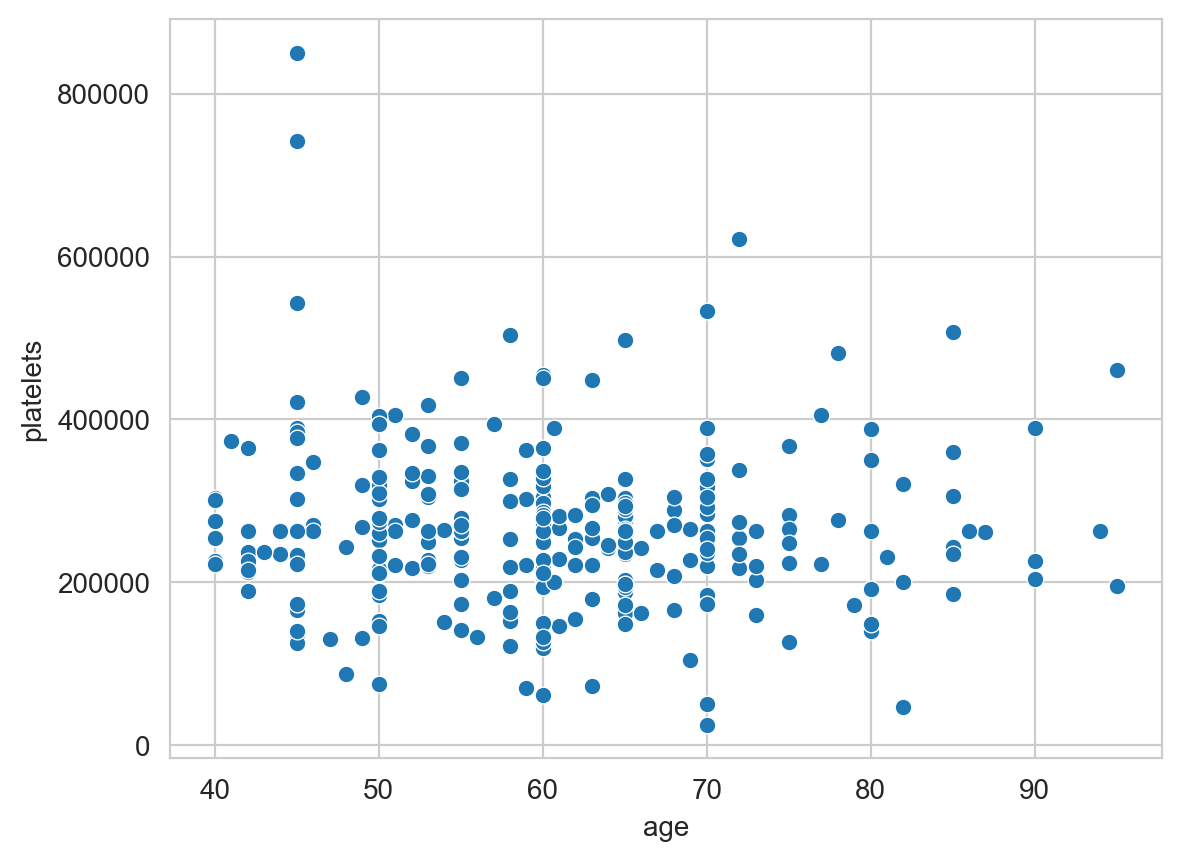

In [10]:
# use seaborn to create a scatter plot of 'age' vs 'platelets'
seaborn.scatterplot(data=df, x='age', y='platelets')

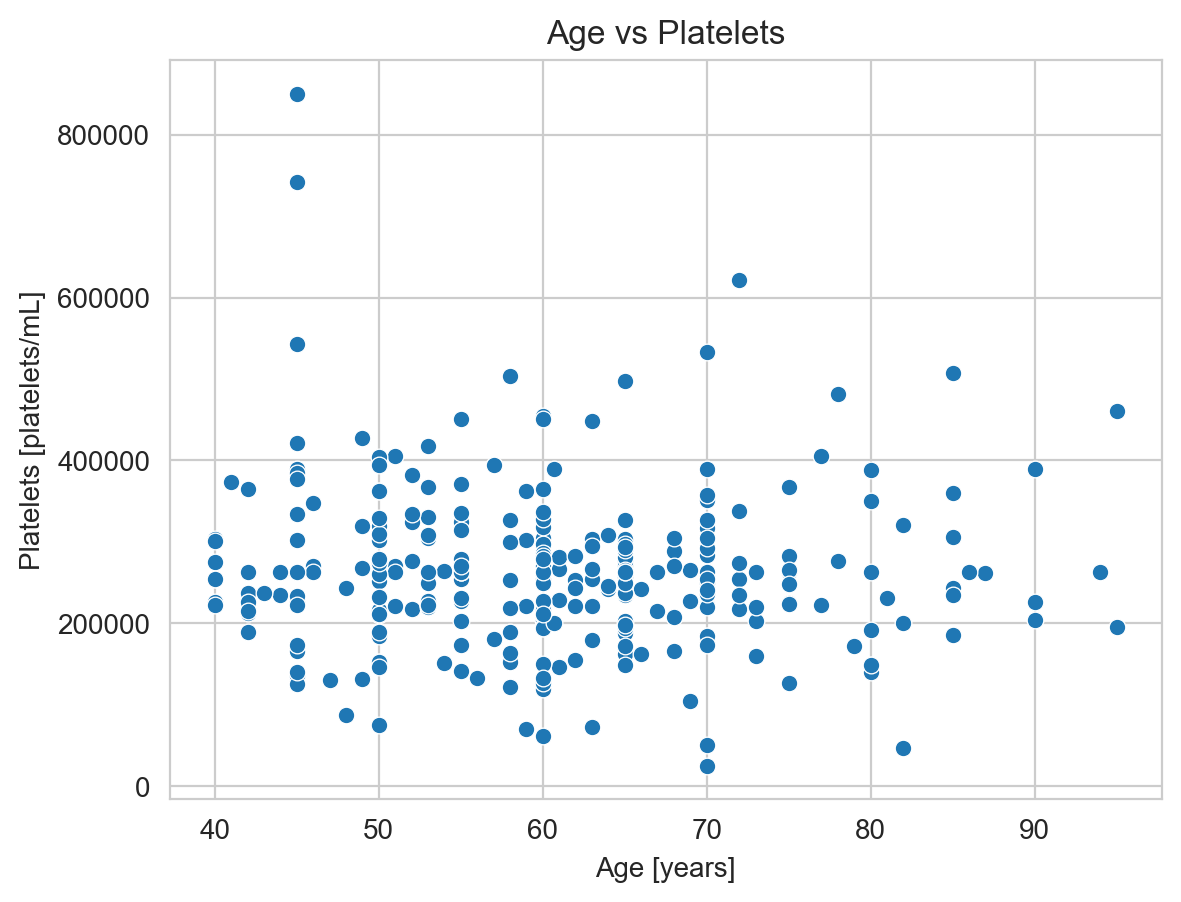

In [11]:
#Recreate the plot and add the title "Age vs Platelets"
#Add the horizontal axis title "Age [years]"
# Add the vertical axis title "Platelets[platelets/mL]"
seaborn.scatterplot(data=df, x='age', y='platelets')
pyplot.title('Age vs Platelets')
pyplot.xlabel('Age [years]')
pyplot.ylabel('Platelets [platelets/mL]')
pyplot.show()

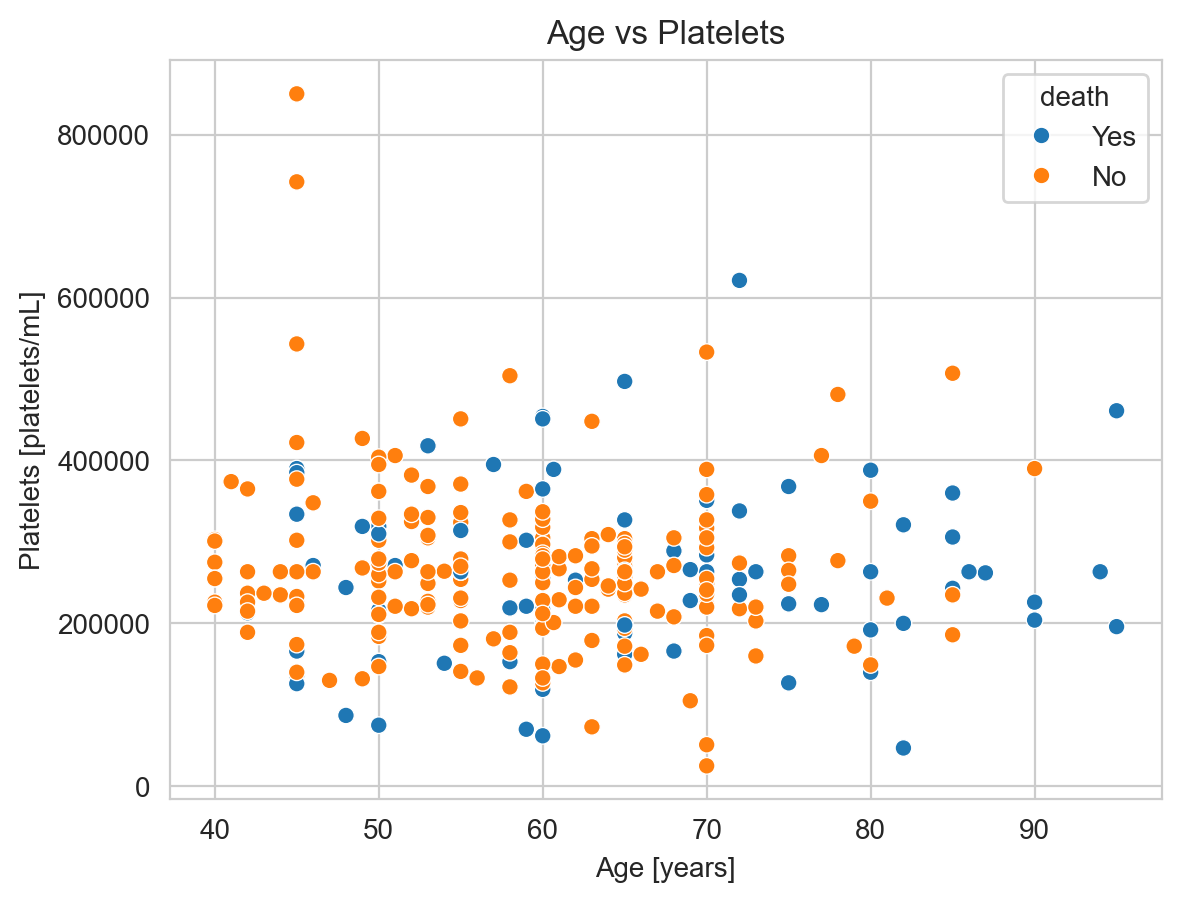

In [12]:
#Recreate the plot and distinguish between the 'death' categories using different colors
seaborn.scatterplot(data=df, x='age', y='platelets', hue='death')
pyplot.title('Age vs Platelets')
pyplot.xlabel('Age [years]')
pyplot.ylabel('Platelets [platelets/mL]')
pyplot.show()

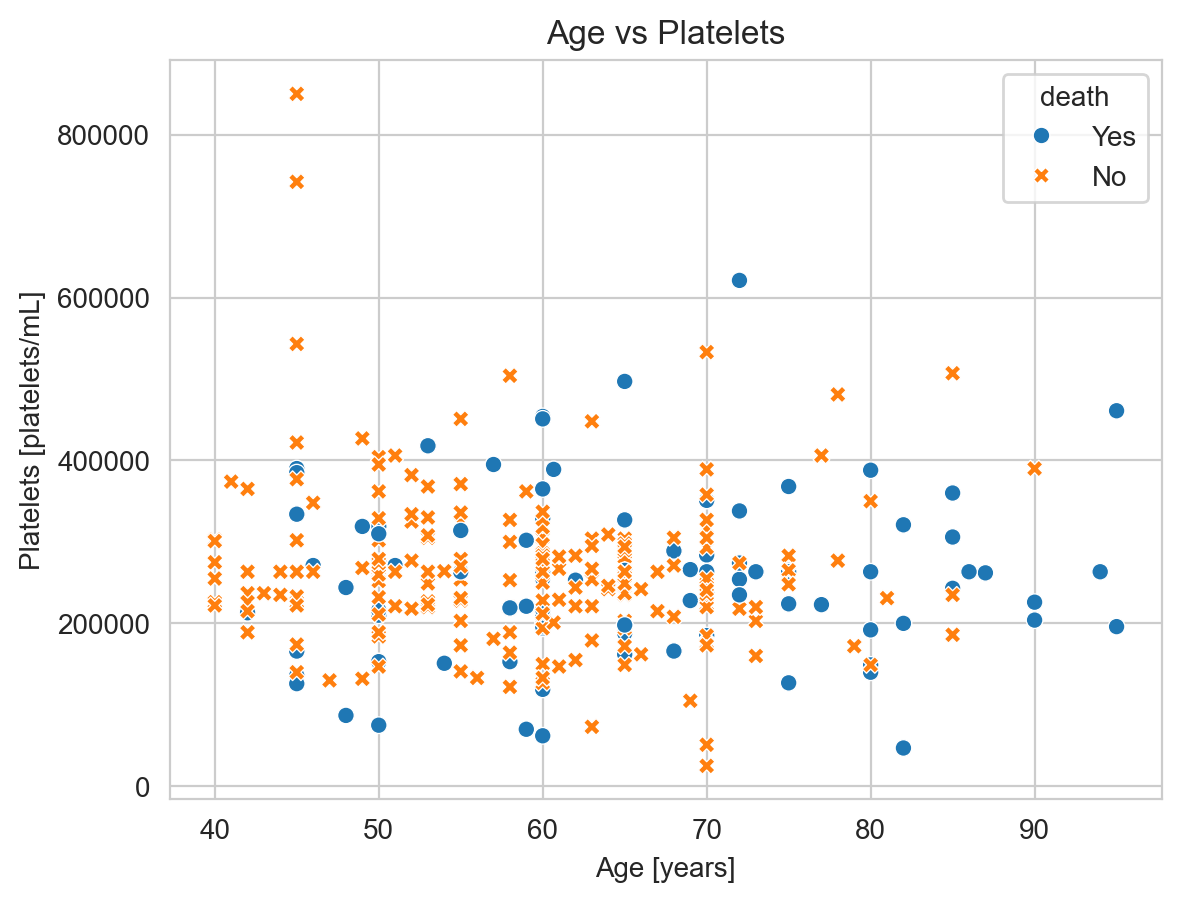

In [13]:
#Recreate the plot and distinguish between the 'death' categories using different styles
seaborn.scatterplot(data=df, x='age', y='platelets', hue= 'death', style='death')
pyplot.title('Age vs Platelets')
pyplot.xlabel('Age [years]')
pyplot.ylabel('Platelets [platelets/mL]')
pyplot.show()

<Axes: xlabel='age', ylabel='platelets'>

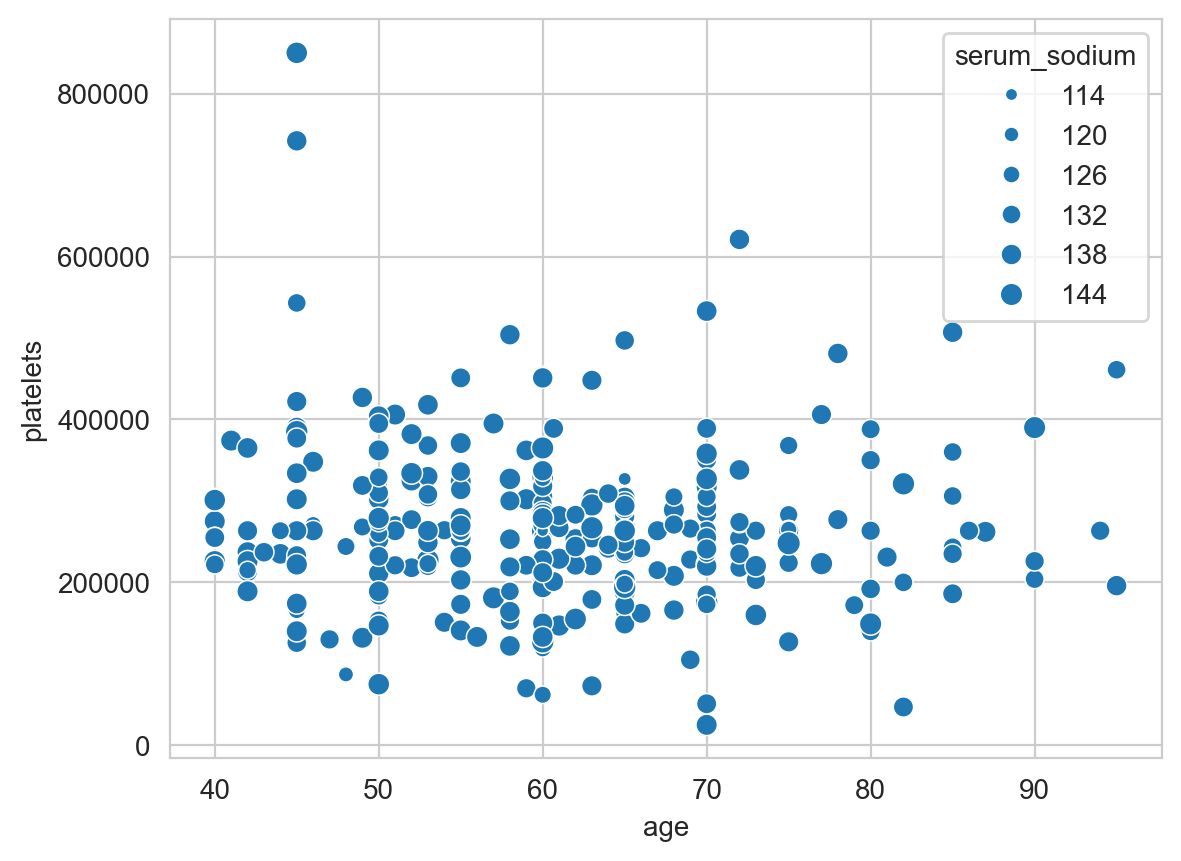

In [14]:
#Create a scatterplot  of 'age' vs 'platelets' and add 'serum_sodium' as the size of the marker
seaborn.scatterplot(data=df, x='age', y='platelets', size='serum_sodium')

<Axes: xlabel='age', ylabel='platelets'>

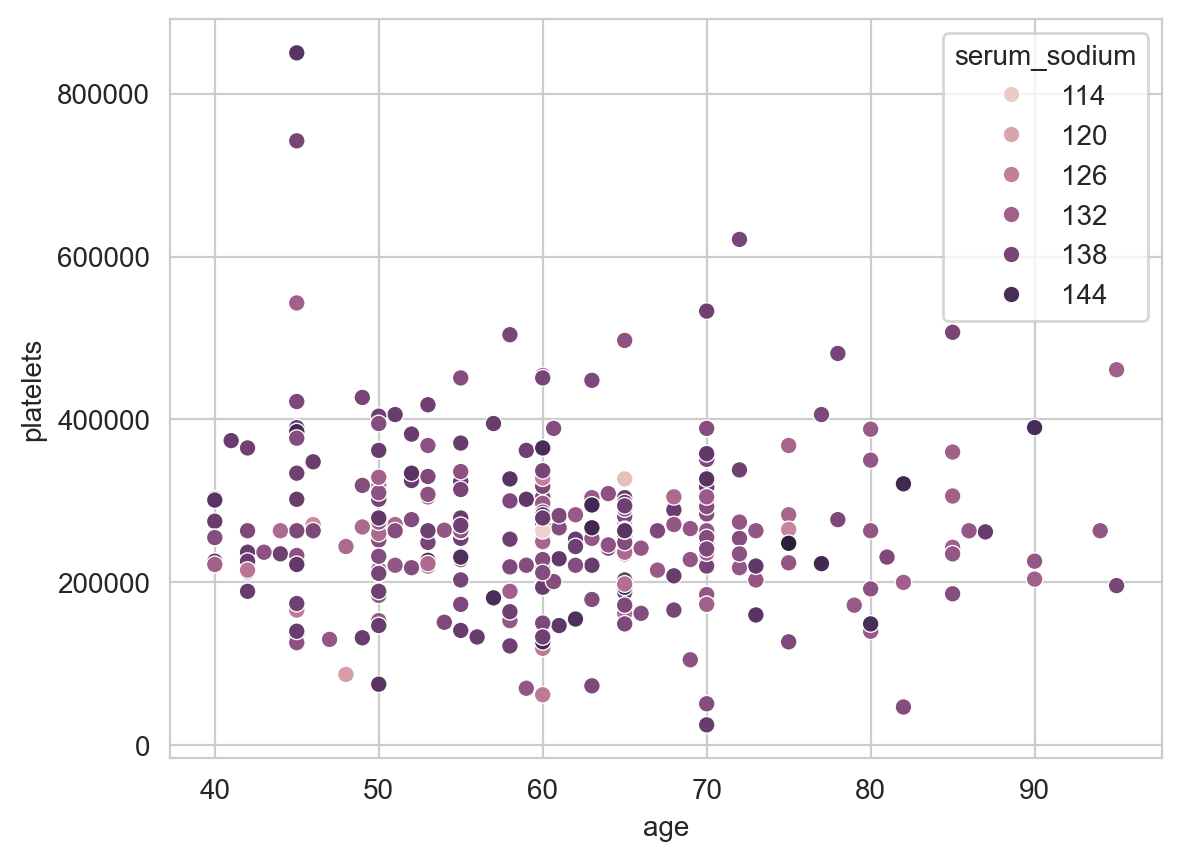

In [15]:
#Create a scatterplot  of 'age' vs 'platelets' and add 'serum_sodium' as the color of the marker
seaborn.scatterplot(data=df, x='age', y='platelets', hue ='serum_sodium')


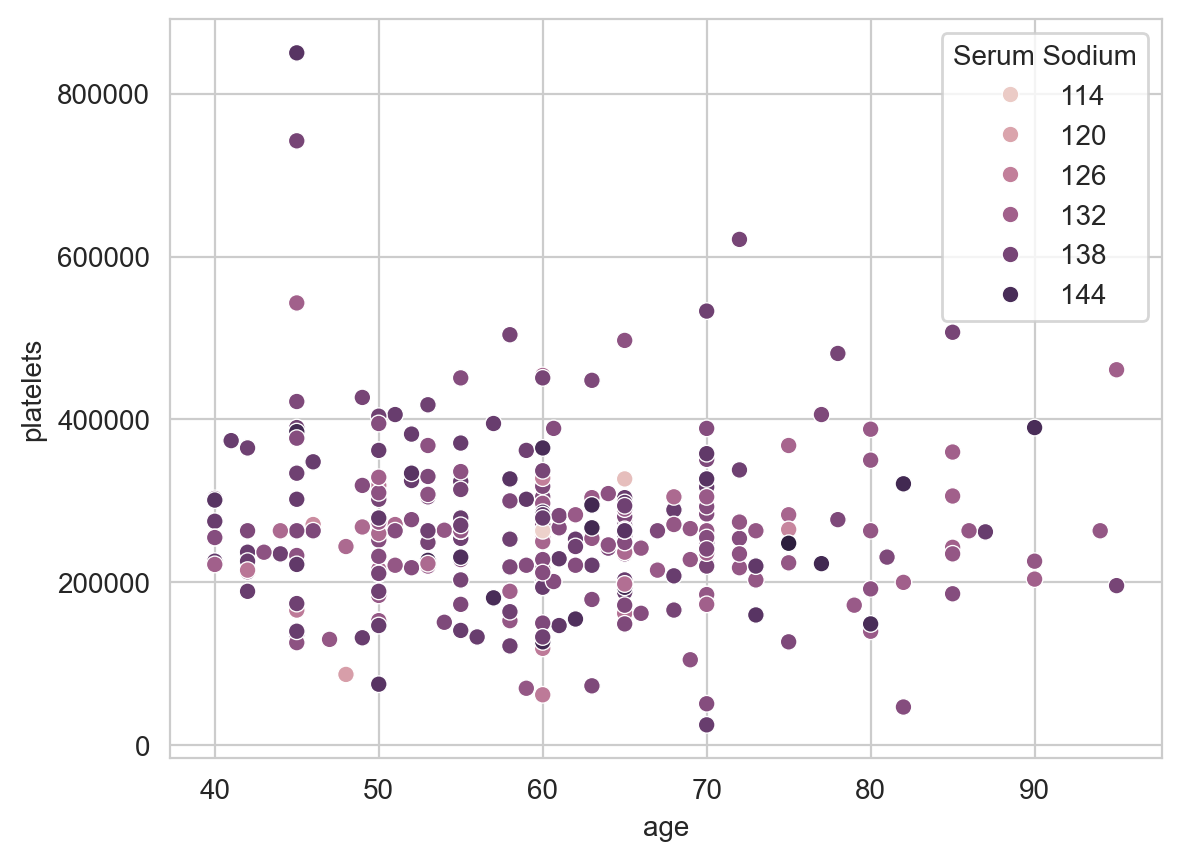

In [16]:
#Recreat the plot above but change the legend title to "Serum Sodium"
seaborn.scatterplot(data=df, x='age', y='platelets', hue ='serum_sodium').legend(title = "Serum Sodium")

<Axes: xlabel='age', ylabel='Count'>

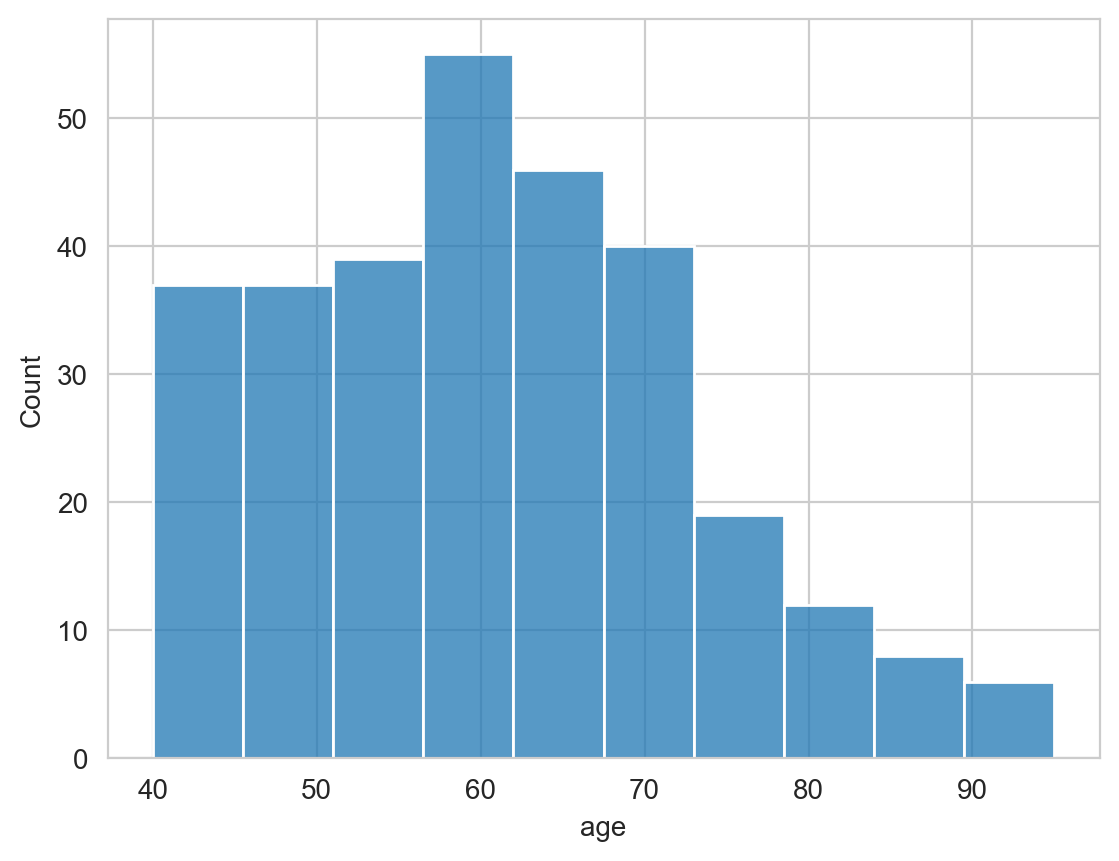

In [17]:
#Use seaborn to create a histogram of the 'age' column per decade
seaborn.histplot(data=df, x='age')


<Axes: xlabel='age', ylabel='Count'>

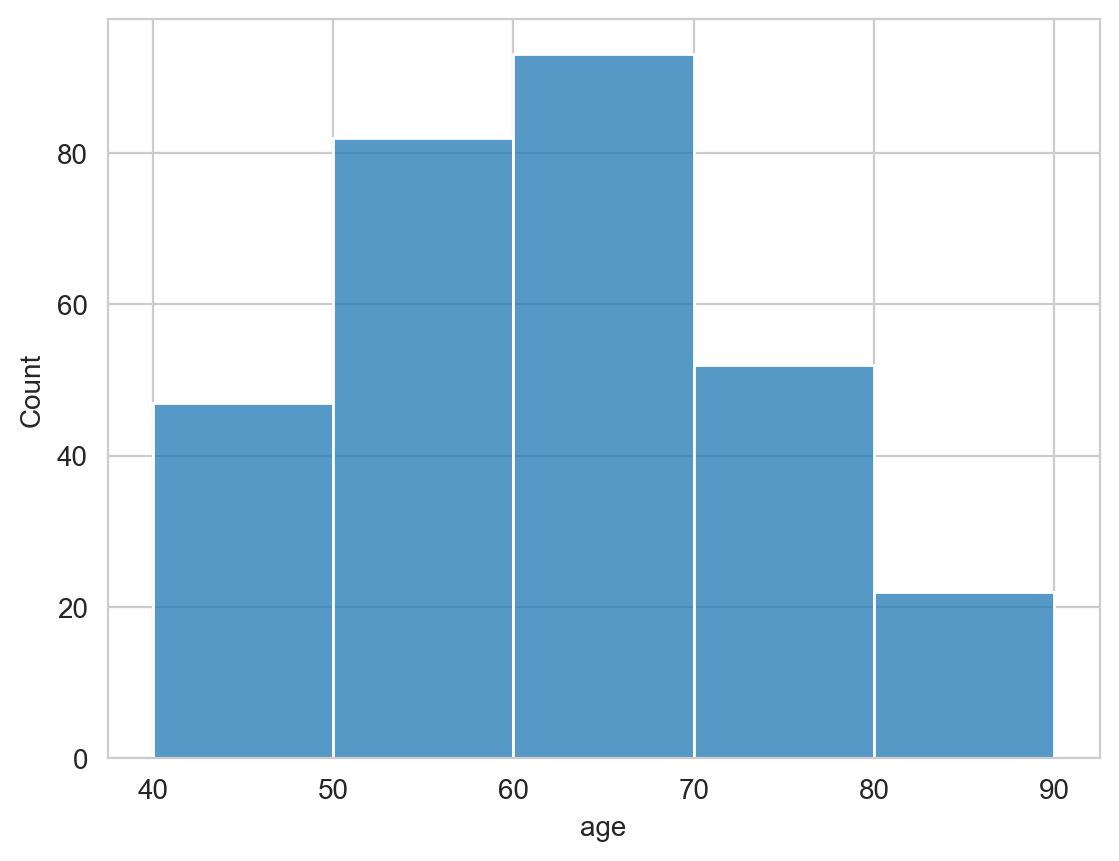

In [18]:
#Recreate the histogram above but set the bin size to 10 starting at 40 and incrementing in steps of 10
seaborn.histplot(data=df, x='age', binwidth=10, binrange=(40, 90))

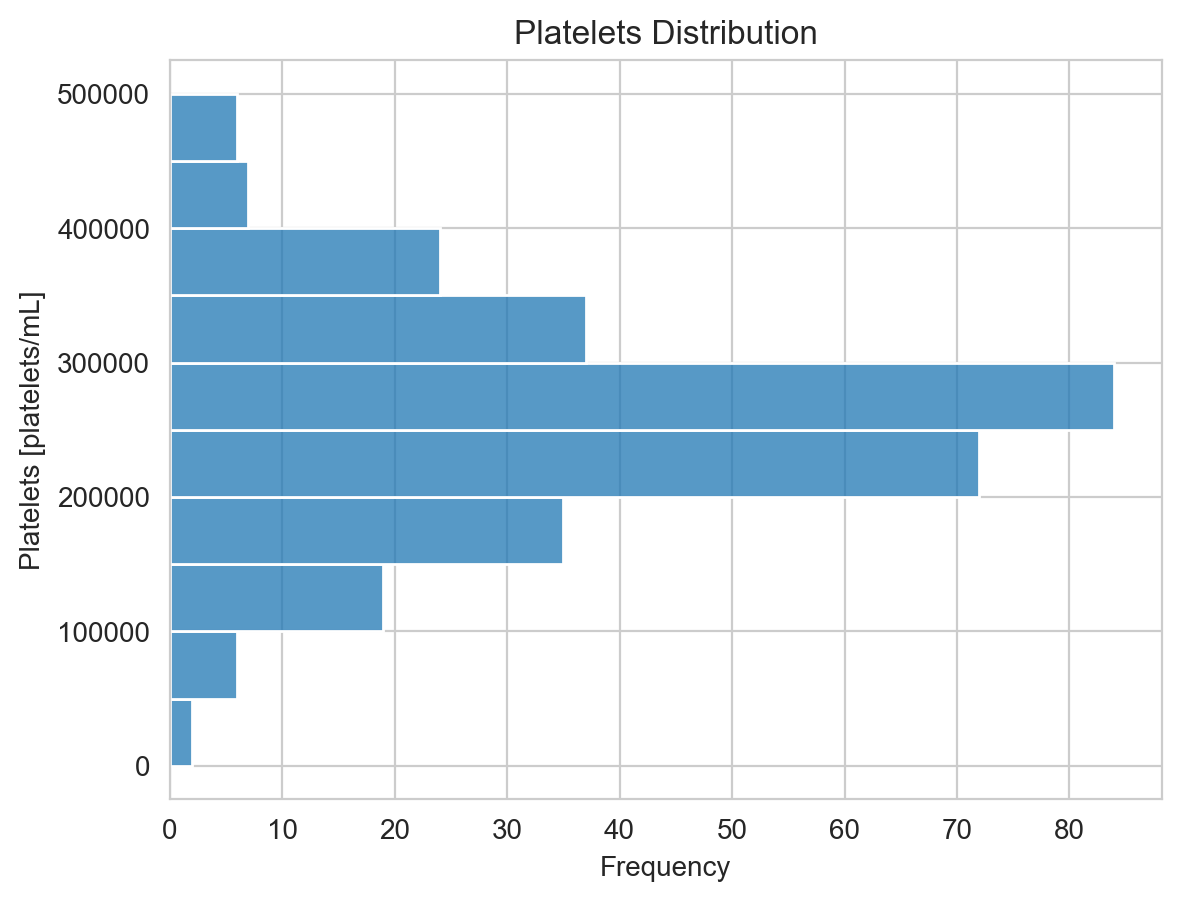

In [19]:
#Create a horizontal histogram of the 'platelets' column
#For the bins, start at 0 and increment in steps of 50000
#Add the title 'Platelets Distribution'
#Add the horizontal axis title "Frequncy"
#Add the vertical axis title "Platelets [platelets/mL]"
seaborn.histplot(data=df, y='platelets', binwidth=50000, binrange=(0, 500000))
pyplot.title('Platelets Distribution')
pyplot.xlabel('Frequency')
pyplot.ylabel('Platelets [platelets/mL]')
pyplot.show()

<Axes: xlabel='age', ylabel='Count'>

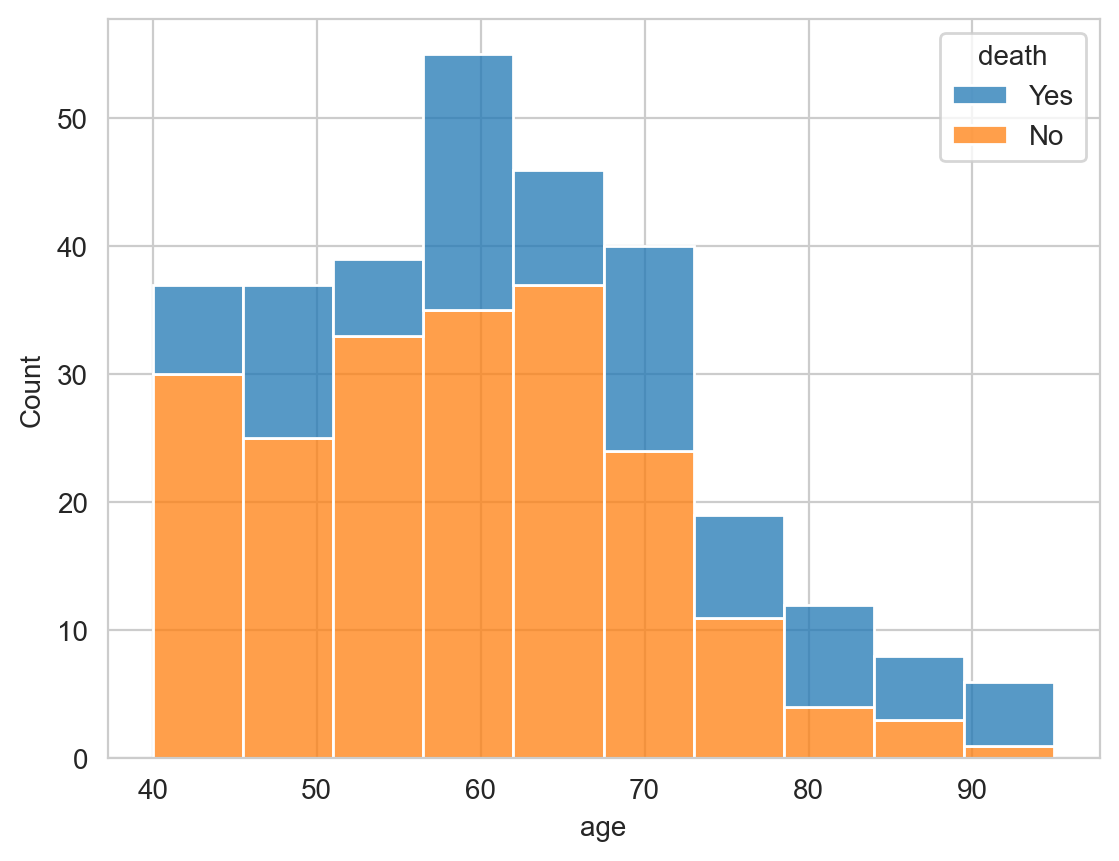

In [21]:
#Create a vertical histogram of the 'age' column for each category in the 'death' column
seaborn.histplot(data=df, x='age', hue='death', multiple ='stack')

<Axes: xlabel='age', ylabel='Count'>

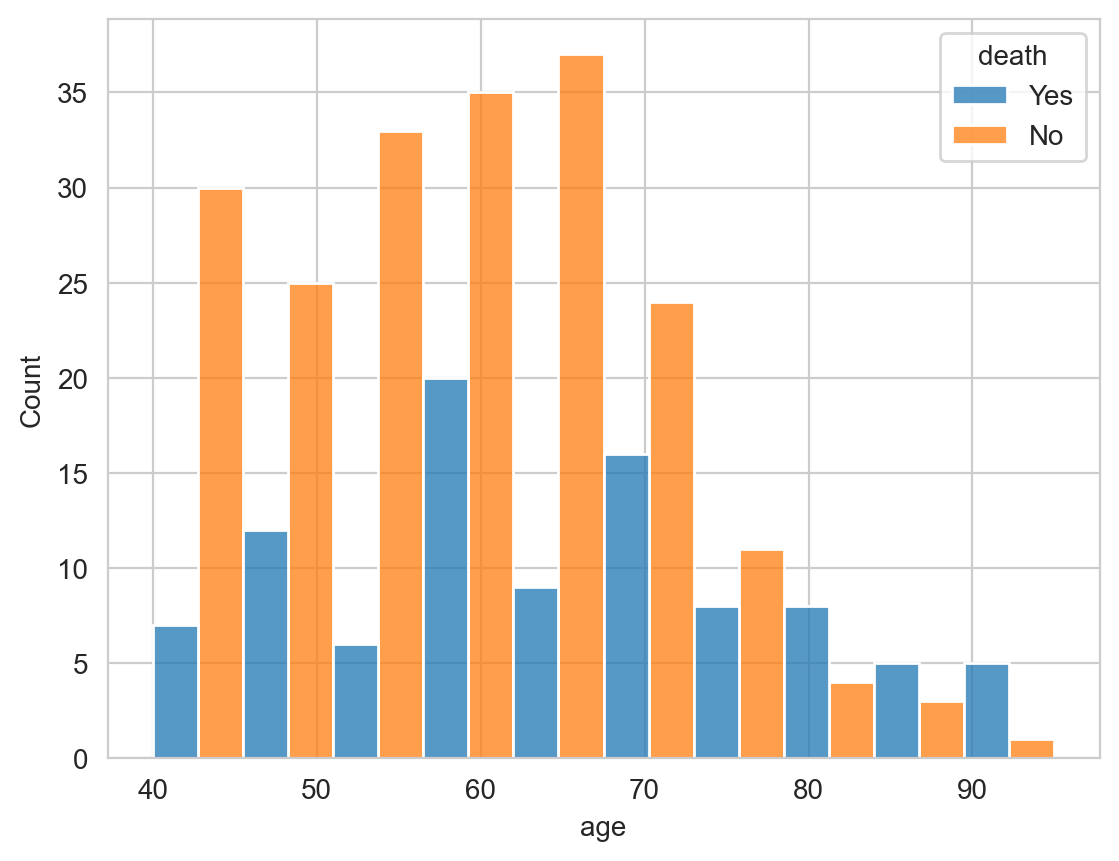

In [22]:
#Create a histogram of the 'age' column for each category in the 'death' column
#Create a side-by-side histogram
seaborn.histplot(data=df, x='age', hue='death', multiple ='dodge')

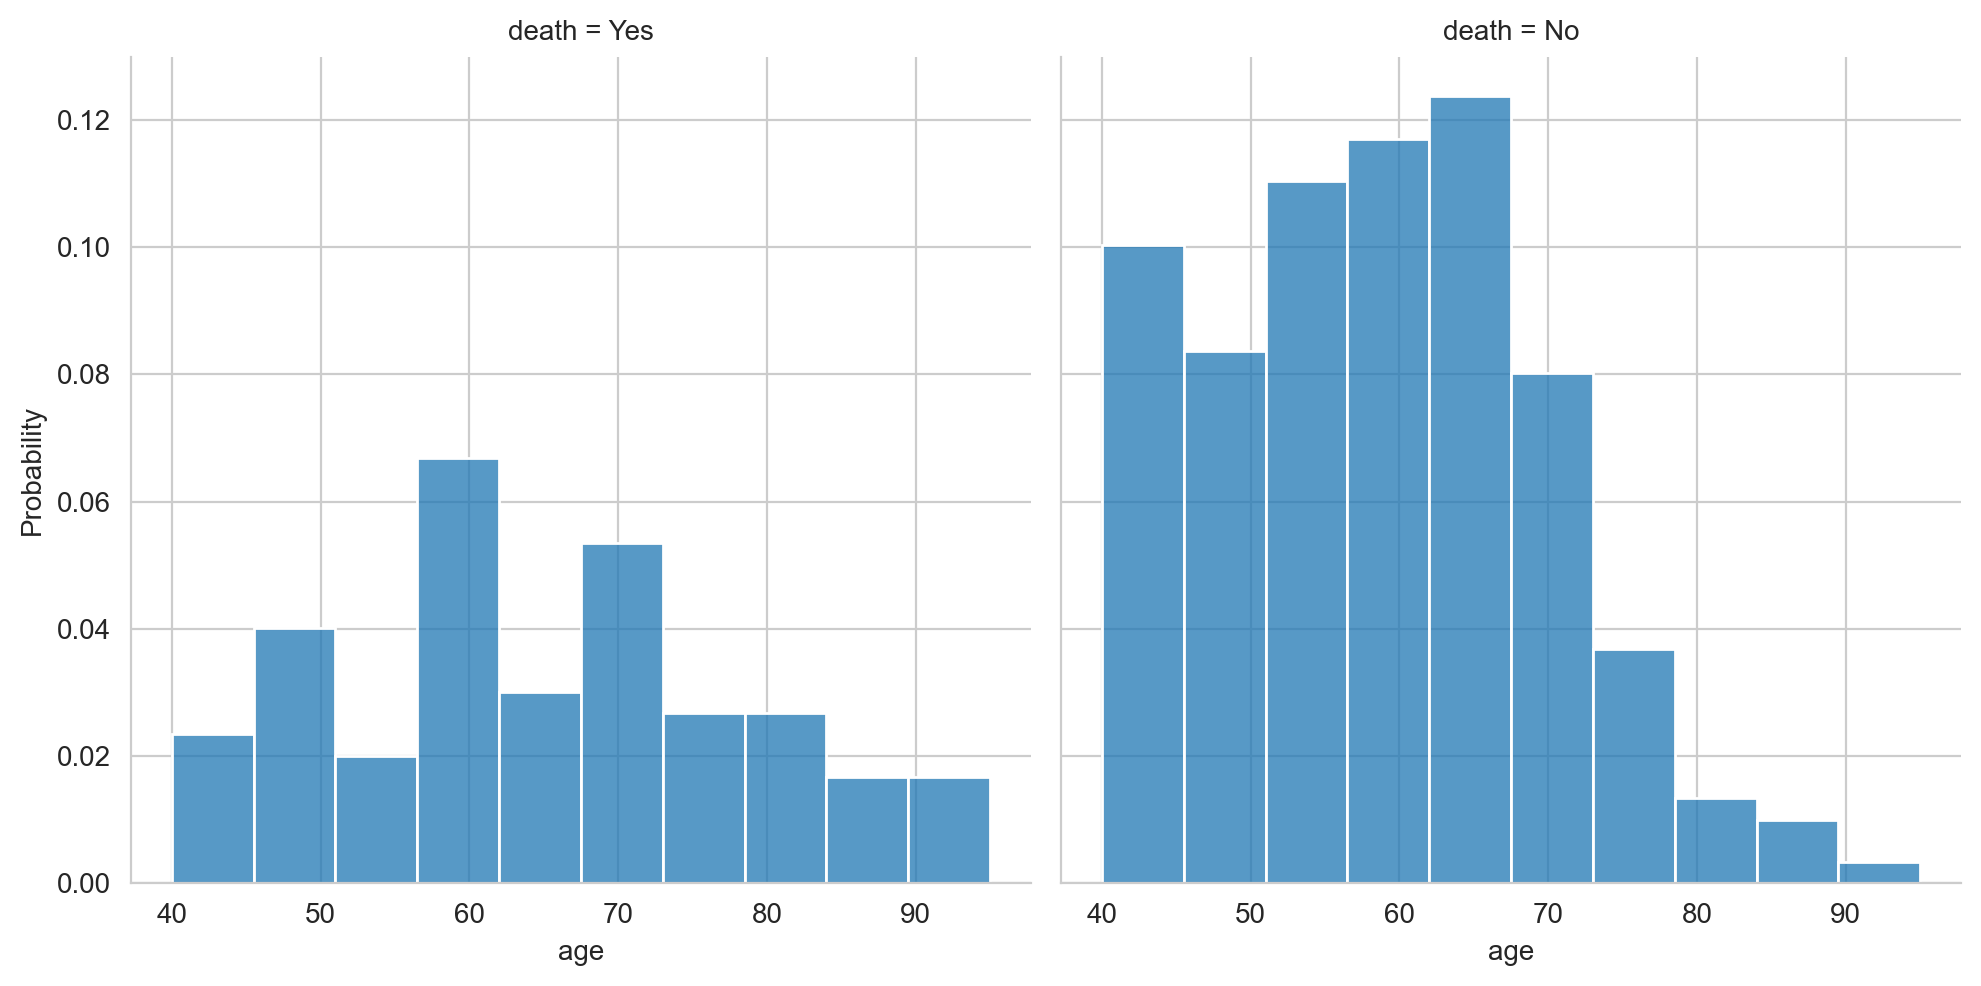

In [23]:
seaborn.displot(data=df, x='age', col = 'death', stat = 'probability');

<Axes: xlabel='age', ylabel='platelets'>

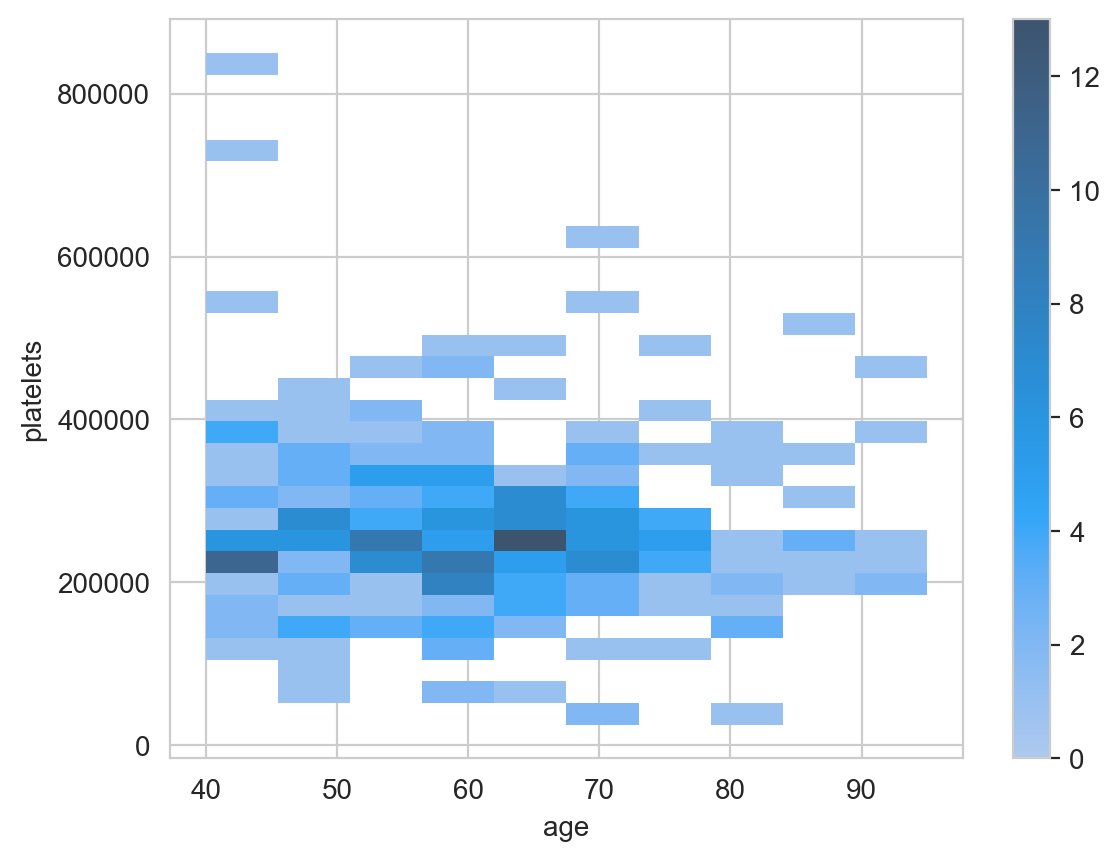

In [25]:
#Create a heat map of 'age' versus 'platelets'
#Add a color bar to the heatmap 
seaborn.histplot(data=df, x='age', y='platelets', cbar=True)

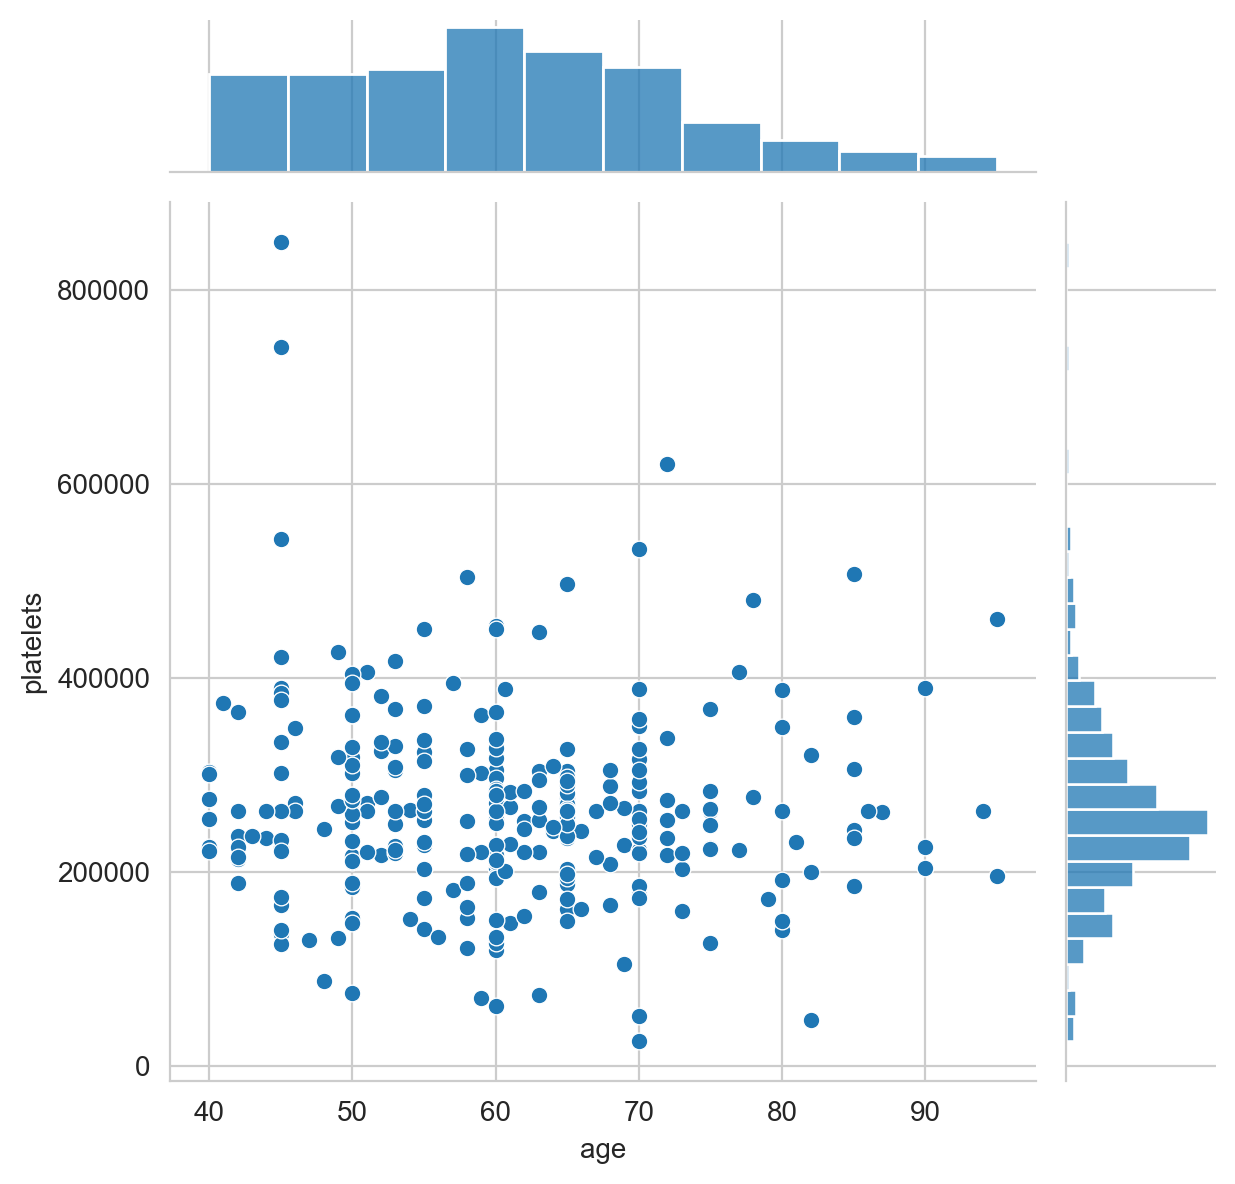

In [26]:
seaborn.jointplot(
    df,
    x='age',
    y='platelets',
)

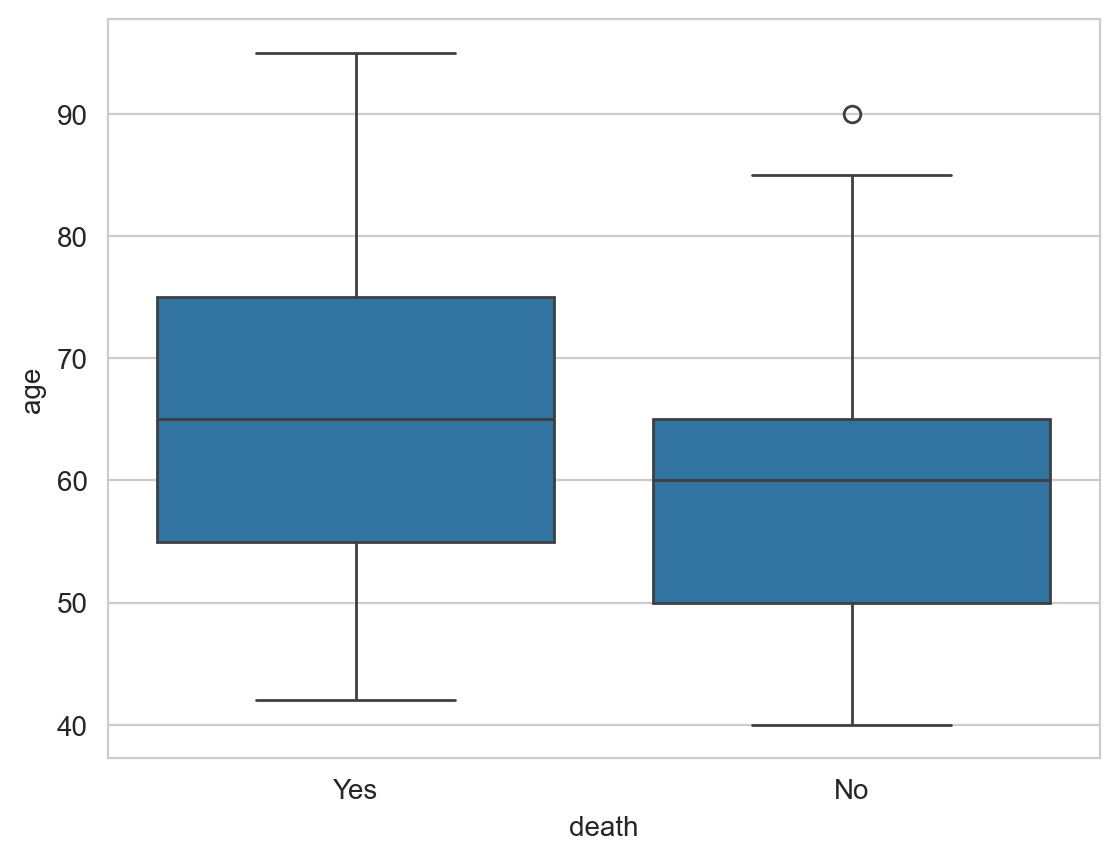

In [29]:
#Create a box and whisker plot of the 'age' column for each category in the 'death' column
seaborn.boxplot(data=df, x='death', y='age');

In [30]:
# do a students t test using the scipy stats to compare the age of the no and yes categories
from scipy import stats

no = df[df.death == 'No'].age
yes = df[df.death == 'Yes'].age
stats.ttest_ind(no, yes)

TtestResult(statistic=np.float64(-4.520613504937705), pvalue=np.float64(8.916762946533357e-06), df=np.float64(297.0))

In [31]:
df.death

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
294     No
295     No
296     No
297     No
298     No
Name: death, Length: 299, dtype: object